# Compute power spectrum of quake source
# Fit the moment and corner frequency
## S. Nielsen 2019

Import libraries, define filenames and folder paths:

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig
from scipy.fftpack import fft, ifft
import matplotlib
import matplotlib.pyplot as plt
matplotlib.interactive(True)
from pylab import plot, xlabel, ylabel
from scipy import arange
from scipy import signal
import time
import warnings
import ipywidgets as widgets
from ipywidgets import *
warnings.filterwarnings('ignore')
##########################################
from transforms import forward_ft, backward_ft
from utilities import read_ascii1, read_ascii2, taper
##########################################
pat='/data/TeachingMaterial/'
dir1=pat+'2017-09-08-mww81-near-coast-of-chiapas-mexico/'
nam1='IU.WCI.00.BH1.M.2017-09-08T045330.019538.txt'
nam2='IU.WCI.00.BH2.M.2017-09-08T045330.019538.txt'
nam3='IU.WCI.00.BHZ.M.2017-09-08T045330.019538.txt'
nam4='IU.WCI.10.BH1.M.2017-09-08bT045330.019538.txt'
nam5='IU.WCI.10.BH2.M.2017-09-08T045330.019538.txt'
nam6='IU.WCI.10.BHZ.M.2017-09-08T045330.019538.txt'
dir2=pat+'2010-02-27-mw88-near-coast-of-central-chile/'
nam7='II.ESK.10.BHZ.M.2010-02-27T064735.019500.txt'
nam8='II.SACV.00.BHZ.M.2010-02-27T064416.022800.txt'
nam9='II.SACV.10.BHZ.M.2010-02-27T064416.017700.txt'
nam10='IU.PAB.00.BHZ.M.2010-02-27T064648.019538.txt'
nam11='IU.PAB.10.BHZ.M.2010-02-27T064648.019538.txt'
dir3=pat+'2018-01-21-mww63-northern-chile/'
nam12='IU.LVC.00.BHZ.M.2018-01-21T010635.019538.txt'
nam13='IU.LVC.10.BHZ.M.2018-01-21T010635.019538.txt'
nam14='IU.RCBR.00.BHZ.M.2018-01-21T011224.019539.txt'

Which earthquake would you like to analyse:
   1: coast of Chiapas - Mexico (great)
   2: coast of central Chile (greater)
   3: northern Chile (large)
Enter 1, 2 or 3: 3
You chose:
3 -> IU.RCBR.00.BHZ.M.2018-01-21T011224.019539.txt


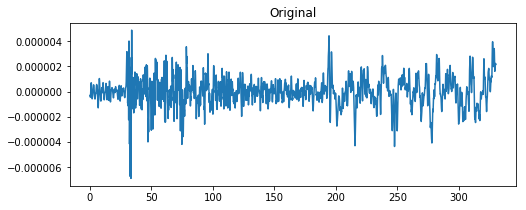

In [14]:
print("Which earthquake would you like to analyse:")
print("   1: coast of Chiapas - Mexico (great)")
print("   2: coast of central Chile (greater)")
print("   3: northern Chile (large)")
try:ans=raw_input("Enter 1, 2 or 3: ")
except:ans=input("Enter 1, 2 or 3: ")
if ans=='1':
    name=dir1+nam2;
    mosca=2.64e22
    dt=0.05
if ans=='2':
    name=dir2+nam8
    mosca=9e23
    dt=0.025
if ans=='3':
    name=dir3+nam14
    dt=0.025
    mosca=4e22
#
print("You chose:"+"\n"+ans+" -> "+nam14)
(dat1,nt)=read_ascii2(name)
offset=np.sum(dat1)/nt
dat1=[x-offset for x in dat1]
recsca=1e-9/2.5 # scaling of receiver counts to m/s
tt=dt*arange(nt);dat1=np.multiply(dat1,recsca)
To=nt*dt;
f, axarr = plt.subplots(1,1,figsize=(8,3))
axarr.plot(tt,dat1);#axarr.grid();
axarr.set_title('Original');

## Integrate and detrend the signal

<IPython.core.display.Javascript object>


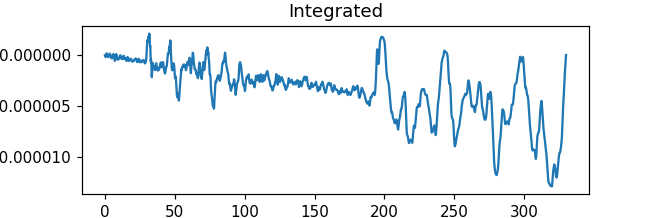

<IPython.core.display.Javascript object>


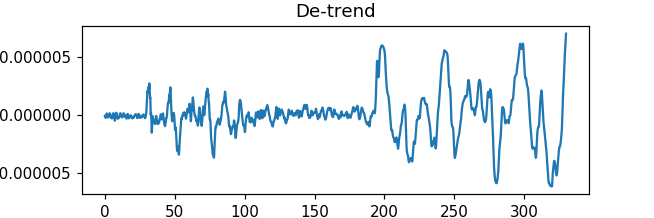

In [15]:
# integrate once to obtain displacement (original is velocity):
%matplotlib notebook
import matplotlib.pyplot as plt
dat_int=np.cumsum((np.multiply(dt,dat1)))
f, axarr = plt.subplots(1,1,figsize=(6,2))
axarr.plot(tt,dat_int);#axarr.grid();
axarr.set_title('Integrated');
f.canvas.draw()
# detrend 
dat_sum=signal.detrend(dat_int)
f, axarr = plt.subplots(1,1,figsize=(6,2))
axarr.plot(tt,dat_sum);#axarr.grid();
axarr.set_title('De-trend');
f.canvas.draw()

## Clip and taper the displacement trace

<IPython.core.display.Javascript object>


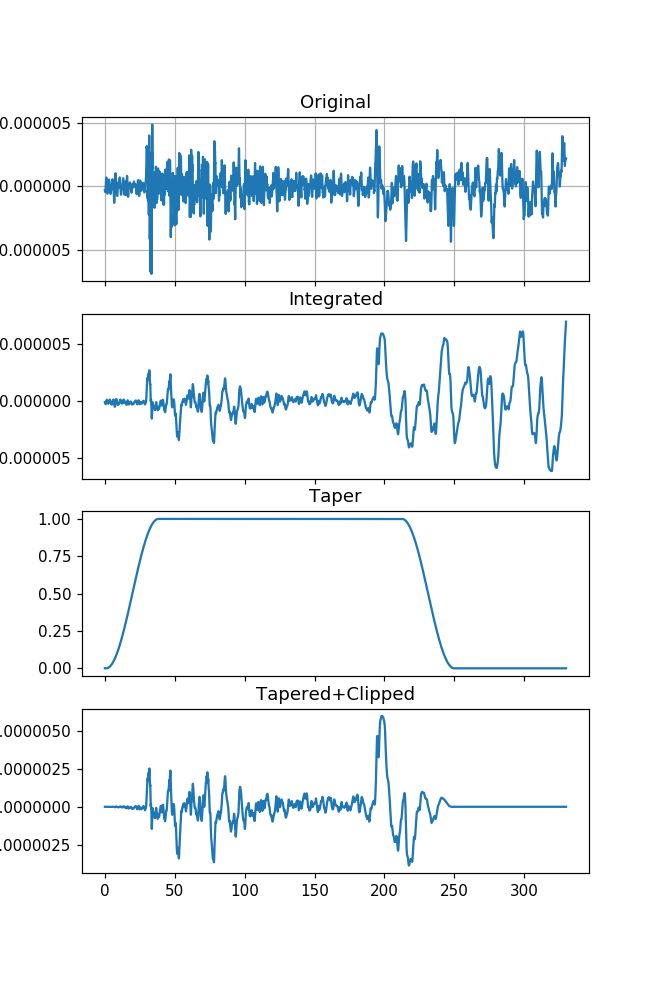

clip happy? (y/n) y
ok


In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
t1f=1.;t2f=250;
ans='n'
f, axarr = plt.subplots(4, sharex=True, figsize=(6,9))
while ans=='n':
    t1=int(t1f/dt);t2=int(t2f/dt);
    tape=taper(nt,t1,t2,0.3,np.cos,np.zeros,np.concatenate)
    dat_sum_w=np.multiply(tape,dat_sum) 
    axarr[0].plot(tt,dat1);axarr[0].grid();
    axarr[0].set_title('Original');
    axarr[1].plot(tt,dat_sum);
    axarr[1].set_title('Integrated');
    axarr[2].plot(tt,tape);
    axarr[2].set_title('Taper');
    axarr[3].plot(tt,dat_sum_w);
    axarr[3].set_title('Tapered+Clipped');
    f.canvas.draw();
    #plt.pause(.05);
    try:ans=raw_input("clip happy? (y/n) ")
    except:ans=input("clip happy? (y/n) ")
    if ans=='n':
        for ia in range(3): 
            axarr[ia].clear();
        try:    t1f= float(raw_input('enter new t1f: '))
        except: t1f= float(input('enter new t1f: '))
        try:    t2f= float(raw_input('enter new t2f: '))
        except: t2f= float(input('enter new t2f: '))
print('ok')

## Fit moment and corner frequency:

<IPython.core.display.Javascript object>


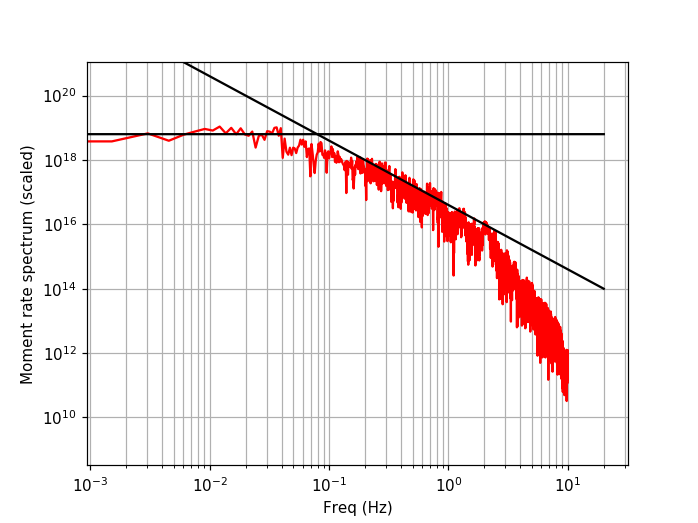

interactive(children=(FloatSlider(value=14.0, description='log_umax', max=22.0, min=10.0, step=0.2), FloatSlid…

4.1022785675289566e-07

In [66]:
# plot the  original trace:
%matplotlib notebook
import matplotlib.pyplot as plt
#
(Y,frq)=forward_ft(dat_sum_w,0.05,arange,fft)
ufa=np.absolute(Y)*mosca
maxufa=max(ufa);minufa=min(ufa)
ans='n'
umax=maxufa*1e-4;off1=maxufa*1e-6;
fii,axx=plt.subplots(1)
#while ans=='n':
umaxa=umax*np.ones(nt)
linex=[];linex.append(1)
for i in range(1,nt): linex.append(off1*frq[i]**(-2))
##plt.figure(1);#######################
plt.loglog(frq[range(int(nt/2))],ufa[range(int(nt/2))],'r')
xlabel('Freq (Hz)'); ylabel('|Y(freq)|')
lineup0,=axx.loglog(frq,linex,'k'); xlabel('Freq (Hz)'); ylabel('|Y(freq)|')
lineup1,=axx.loglog(frq,umaxa,'k'); xlabel('Freq (Hz)')
ylabel('Moment rate spectrum (scaled)')
plt.grid(True, which="both")
#axx.yaxis.get_data_interval()
axx.set_ylim([ 1e-2*minufa, 1e2*maxufa])
fii.canvas.draw()
def update(log_umax,log_amp_1Hz):
    umaxa=(10**log_umax)*np.ones(nt)
    lineup1.set_ydata(umaxa)
    linex=[];linex.append(1);
    for i in range(1,nt): linex.append((10**log_amp_1Hz)*frq[i]**(-2))
    lineup0.set_ydata(linex)
    fii.canvas.draw()
interact(update,log_umax=widgets.FloatSlider(value=14,
                                               min=10,
                                               max=22,
                                               step=.2,
                                               continuous_update=True),
                 log_amp_1Hz=widgets.FloatSlider(value=14,
                                               min=10,
                                               max=22,
                                               step=.2));
Mo=2.647*1e+28*1e-7 # costa-rica 8.1 event 2017
Mo
umax/Mo